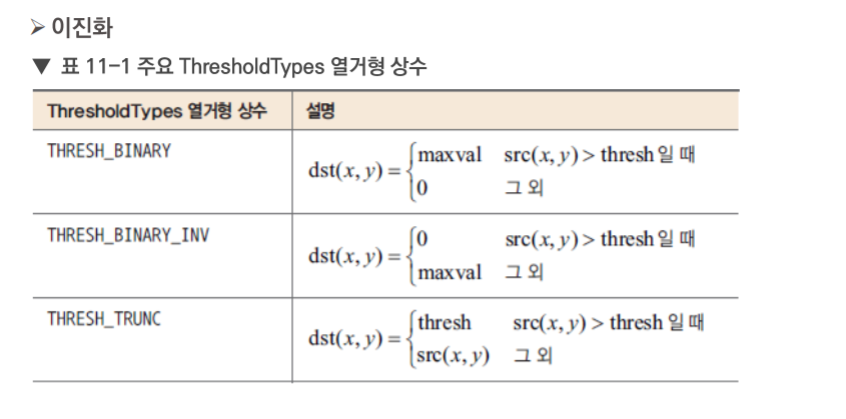  
TRUNK같은경우 특이한데요 Threshold보다 크면 threshold 값으로 지정하고 그렇지 않으면 원래 픽셀로 냅둡니다.

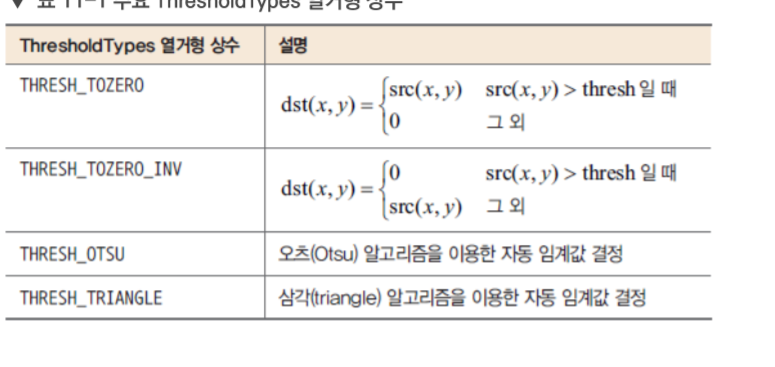
- threshold 보다 크면 원본영상을, 그렇지 않으면 0을 줍니다. 
- 위와 역전, threshold보다 크면 0, 그렇지 않으면 원본영상입니다. 

In [1]:
import numpy as np
import cv2
import random
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

## 1. 이진화

(<AxesSubplot:>, (0.0, 1.0, 0.0, 1.0), None)

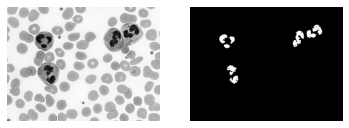

In [2]:
filename = 'neutrophils.png'

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


th = 70   # 70, 190
_, dst = cv2.threshold(src, th, 255, cv2.THRESH_BINARY_INV) ##cv2.THRESH_BINARY_INV


plt.subplot(121), plt.axis('off'), imshow("", src)
plt.subplot(122), plt.axis('off'), imshow("", dst)

In [3]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


filename = 'neutrophils.png'

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey(0)
cv2.destroyAllWindows()

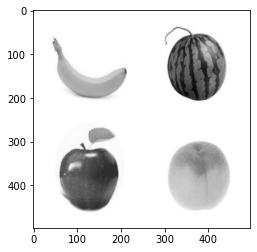

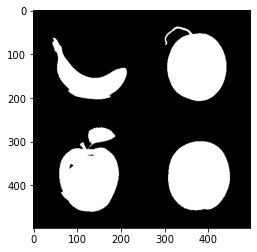

In [4]:
img  = cv2.imread("fruits.png", 0)
_, img_edge = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

imshow("", img)
plt.show()
imshow("", img_edge)

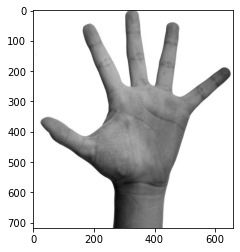

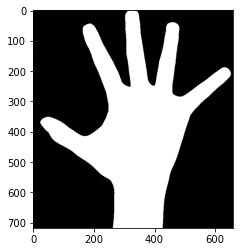

In [5]:
img  = cv2.imread("5.jpg", 0)
_, img_edge = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

imshow("", img)
plt.show()
imshow("", img_edge)

## 2. adaptiveThreshold

In [6]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


## 3. erode / dilate

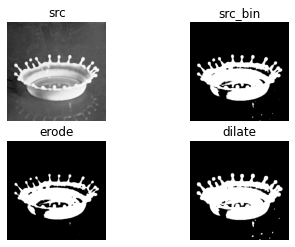

In [7]:
src = cv2.imread('milkdrop.bmp', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst1 = cv2.erode(src_bin, None)
dst2 = cv2.dilate(src_bin, None)

plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
plt.subplot(223), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('erode')
plt.subplot(224), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('dilate')
plt.show() 

## 4. Open/Close 

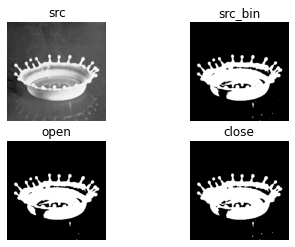

In [8]:
src = cv2.imread('milkdrop.bmp', cv2.IMREAD_GRAYSCALE)


_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, None)
dst2 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None)

plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
plt.subplot(223), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('open')
plt.subplot(224), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('close')
plt.show()

## 5. 다양한 영상에서 이진화

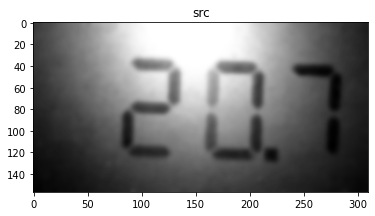

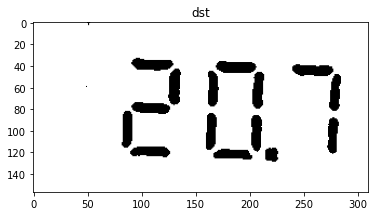

In [9]:
src = cv2.imread('207.png', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (13,13), 0)
dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 21, 5)
imshow('src', src)
plt.show()
imshow('dst', dst)

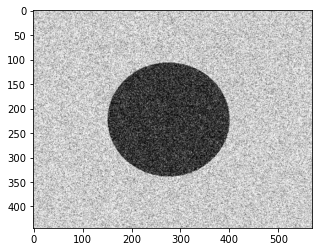

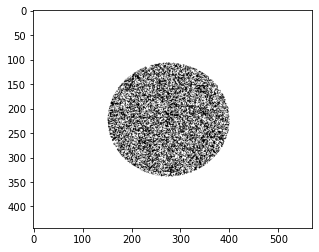

In [10]:
image = cv2.imread('circle.png',0) 
_,binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

imshow("", image)
plt.show()
imshow("", binary)

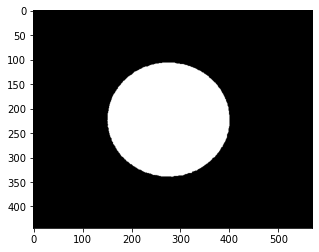

In [11]:
img_blur = cv2.GaussianBlur(image, (5,5), 0)
_,binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
imshow("", binary)

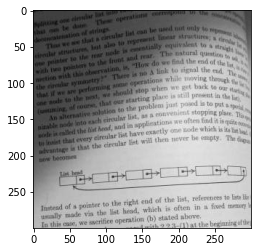

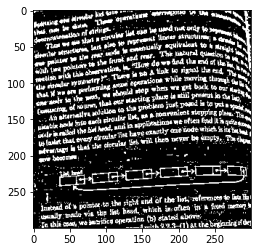

In [12]:
img = cv2.imread('text.jpg', 0)
adapt_mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 21, 2)
imshow("", img)
plt.show()
imshow("", adapt_mask)

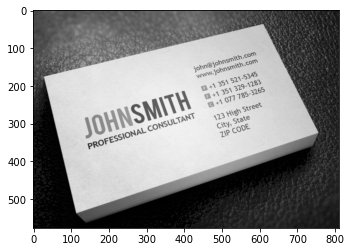

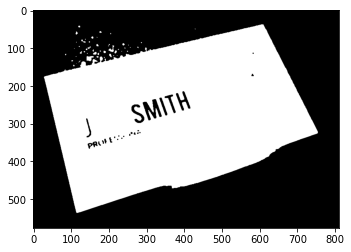

In [13]:
img = cv2.imread('namecard.png', 0)

gray = cv2.GaussianBlur(img, (7, 7), 0)
_,binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None)

imshow("", img)
plt.show()
imshow("", closed )

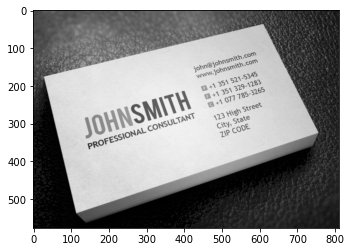

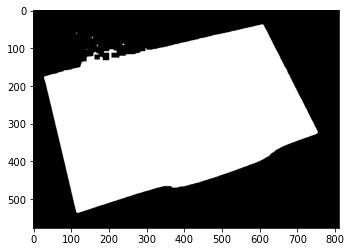

In [25]:
img = cv2.imread('namecard.png', 0)

gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None,iterations=6)

imshow("", img)
plt.show()
imshow("", closed )

In [87]:
dst3 = np.zeros(src.shape, np.uint8)
dst3=  cv2.cvtColor(src, cv2.COLOR_GRAY2RGB)
plt.axis('off'),plt.imshow(dst3)
plt.imshow(dst3)

error: OpenCV(4.5.1) c:\users\appveyor\appdata\local\temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x206ccf44::Set<3,4,-1>,struct cv::impl::A0x206ccf44::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [46]:
!pip install opencv-python

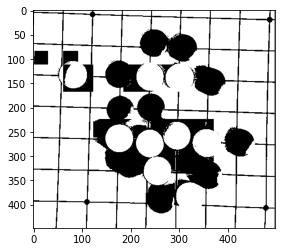

In [57]:
src = cv2.imread('stone.png')
src=  cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
bw = src.shape[1] // 16
bh = src.shape[0] // 16
for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)
plt.imshow(dst1,cmap='gray')

In [124]:
src = cv2.imread('stone.png',cv2.IMREAD_COLOR)
src=  cv2.cvtColor(src, cv2.COLOR_BGR2RGB)


In [125]:

dst=  cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst=  cv2.GaussianBlur(dst,(5,5),0)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f3283327f0>)

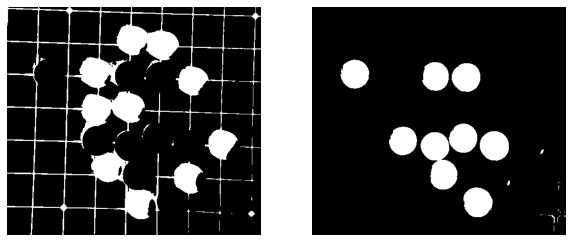

In [126]:
_,dst1=cv2.threshold(dst,100,150,cv2.THRESH_BINARY_INV)#검은색검출
_,dst2=cv2.threshold(dst,170,255,cv2.THRESH_BINARY)#흰색검출
plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.axis('off'), plt.imshow(dst1,cmap='gray')
plt.subplot(122)
plt.axis('off'),plt.imshow(dst2,cmap='gray')

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f32d56dc70>)

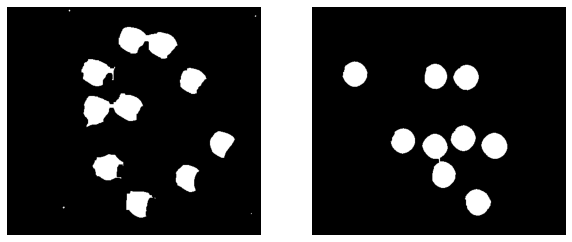

In [129]:
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, None)
MASK1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, None)

dst2 = cv2.morphologyEx(dst2, cv2.MORPH_ERODE, None)
MASK2 = cv2.morphologyEx(dst2, cv2.MORPH_ERODE, None)


plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.axis('off'), plt.imshow(MASK1,cmap='gray')
plt.subplot(122)
plt.axis('off'),plt.imshow(MASK2,cmap='gray')

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f329ea65e0>)

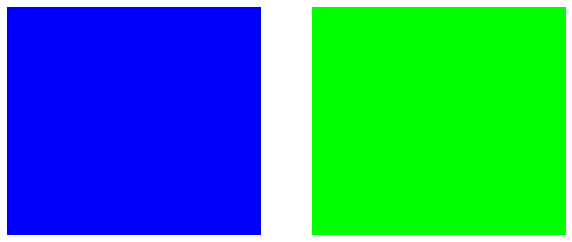

In [128]:
Blue = np.full((448, 498, 3), (0, 0, 255), dtype=np.uint8)
Green = np.full((448, 498, 3), (0, 255, 0), dtype=np.uint8)
plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.axis('off'), plt.imshow(Blue)
plt.subplot(122)
plt.axis('off'),plt.imshow(Green)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f329f534f0>)

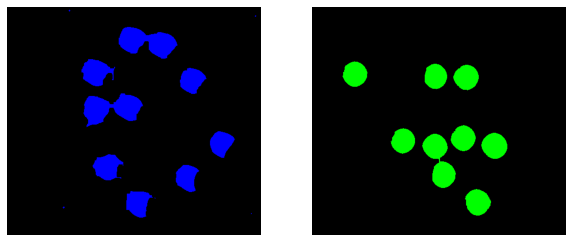

In [130]:
dst1=cv2.copyTo(Blue,MASK1)
dst2=cv2.copyTo(Green,MASK2)
plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.axis('off'), plt.imshow(dst1)
plt.subplot(122)
plt.axis('off'),plt.imshow(dst2)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f32d670f70>)

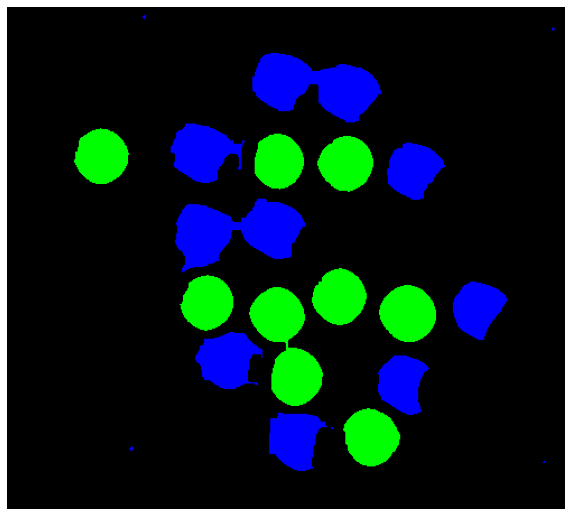

In [131]:
final=cv2.add(dst1,dst2)
plt.subplots(figsize=(10,10))
plt.axis('off'), plt.imshow(final)

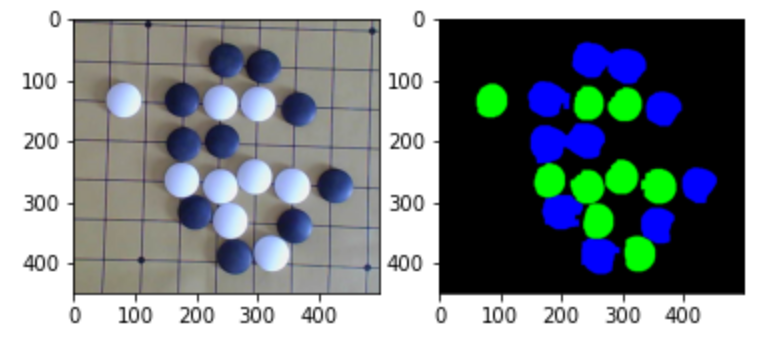

In [122]:
dst3=cv2.add(dst1,dst2)
dst3= cv2.cvtColor(dst3, cv2.COLOR_GRAY2RGB,dtype=np.uint8)
plt.axis('off'), plt.imshow(dst3,cmap='gray')

TypeError: 'dtype' is an invalid keyword argument for cvtColor()

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1f327c77a30>)

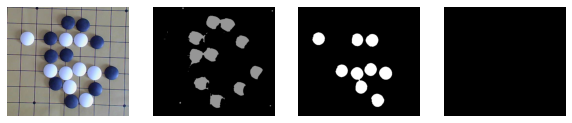

In [103]:
dst1=  cv2.cvtColor(dst1, cv2.COLOR_GRAY2RGB)
dst2=  cv2.cvtColor(dst2, cv2.COLOR_GRAY2RGB)

dst3 = np.full((448, 498, 3), (0, 0, 0), dtype=np.uint8)
#dst3=cv2.add(dst1,dst2)

#dst3=cv2.add(dst1,dst2)
#dst3=cv2.add(dst1,dst2)
#dst3 = cv2.add(dst1, dst2, dtype=cv2.CV_8UC3)

plt.subplots(figsize=(10,10))
plt.subplot(141)
plt.axis('off'), plt.imshow(src)
plt.subplot(142)
plt.axis('off'),plt.imshow(dst1)
plt.subplot(143)
plt.axis('off'),plt.imshow(dst2)
plt.subplot(144)
plt.axis('off'),plt.imshow(dst3)

#dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 129, 5)

In [92]:
print(src.shape)
print(dst1.shape)
print(dst2.shape)
print(dst3.shape)

(448, 498, 3)
(448, 498, 3)
(448, 498, 3)
(448, 498, 3)
